In [6]:
from PIL import Image
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
import rasterio

(4, 512, 512)
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_block_shapes', '_closed', '_count', '_crs', '_crs_wkt', '_descriptions', '_dtypes', '_env', '_gcps', '_get_crs', '_get_rpcs', '_handle_crswkt', '_has_band', '_has_gcps_or_rpcs', '_mask_flags', '_nodatavals', '_offsets', '_read', '_rpcs', '_scales', '_set_all_descriptions', '_set_all_offsets', '_set_all_scales', '_set_all_units', '_set_attrs_from_dataset_handle', '_set_crs', '_set_gcps', '_set_nodatavals', '_set_rpcs', '_transform', '_units', 'block_shapes', 'block_size', 'block_window', 'block_windows', 'bounds', 'checksum', 'close', 'closed', 'colorinterp',

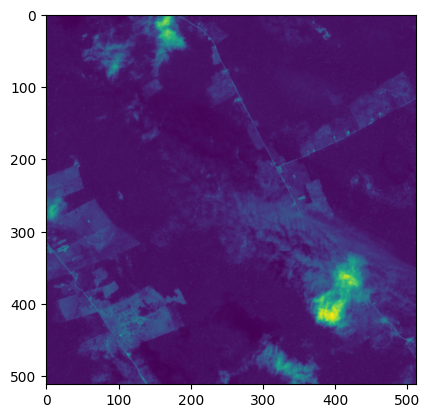

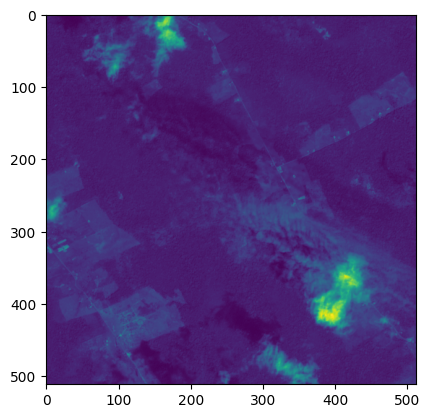

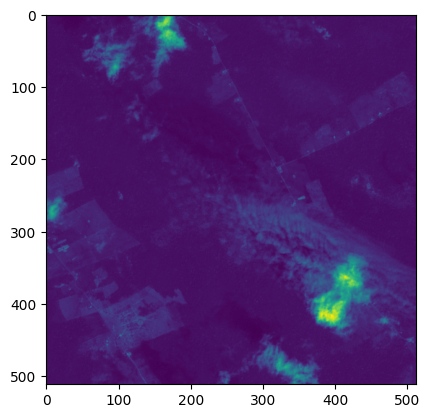

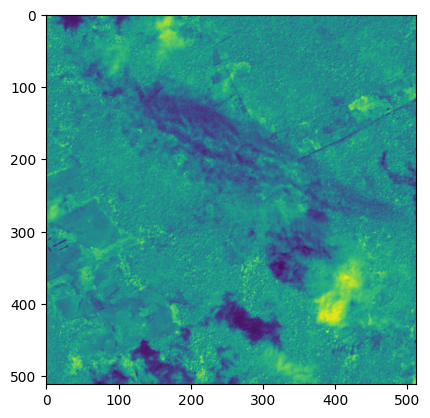

In [7]:
# AMAZON
image_path = 'data/AMAZON/Training/image/S2A_MSIL2A_20200111T142701_N0213_R053_T20NQG_20200111T164651_01_13.tif'
dataset = rasterio.open(image_path)
# Note GetRasterBand() takes band no. starting from 1 not 0
dataset_array = dataset.read()
print(dataset_array.shape)
print(dir(dataset))
for band_idx in range(1, 5):
    band = dataset.read(band_idx)
    if band is None:
        print(f"No data for band: {band_idx}")
    else:
        imarray = band
        assert((imarray == dataset_array[band_idx - 1]).all())
        plt.figure()
        plt.imshow(imarray)
        print(f"Statistics for band {band_idx}:")
        print(f"Shape: {imarray.shape}")
        print(f"Min/Max: {np.min(imarray)}/{np.max(imarray)}")
        print(f"dtype: {imarray.dtype}")
        print(f"")

(4, 512, 512)
Shape: (512, 512)
Min/Max: 0/1
dtype: uint8


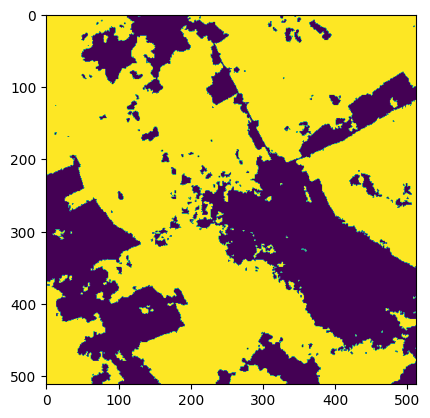

In [8]:
# AMAZON Mask
image_path = 'data/AMAZON/Training/label/S2A_MSIL2A_20200111T142701_N0213_R053_T20NQG_20200111T164651_01_13.tif'
dataset = rasterio.open(image_path) 
# Note GetRasterBand() takes band no. starting from 1 not 0
mask_array = dataset.read(1)
print(dataset_array.shape)

plt.figure()
plt.imshow(mask_array)
print(f"Shape: {mask_array.shape}")
print(f"Min/Max: {np.min(mask_array)}/{np.max(mask_array)}")
print(f"dtype: {mask_array.dtype}")

In [9]:
# DeepGlobe
image_path = 'data/DeepGlobe/train/119_sat.jpg'
im = Image.open(image_path)
imarray = np.array(im)
display(im)
print(imarray.shape)
print(np.min(imarray), np.max(imarray))
print(imarray.dtype)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/karl/Documents/Uni/Makeathon2024/Treetection/data/DeepGlobe/train/119_sat.jpg'

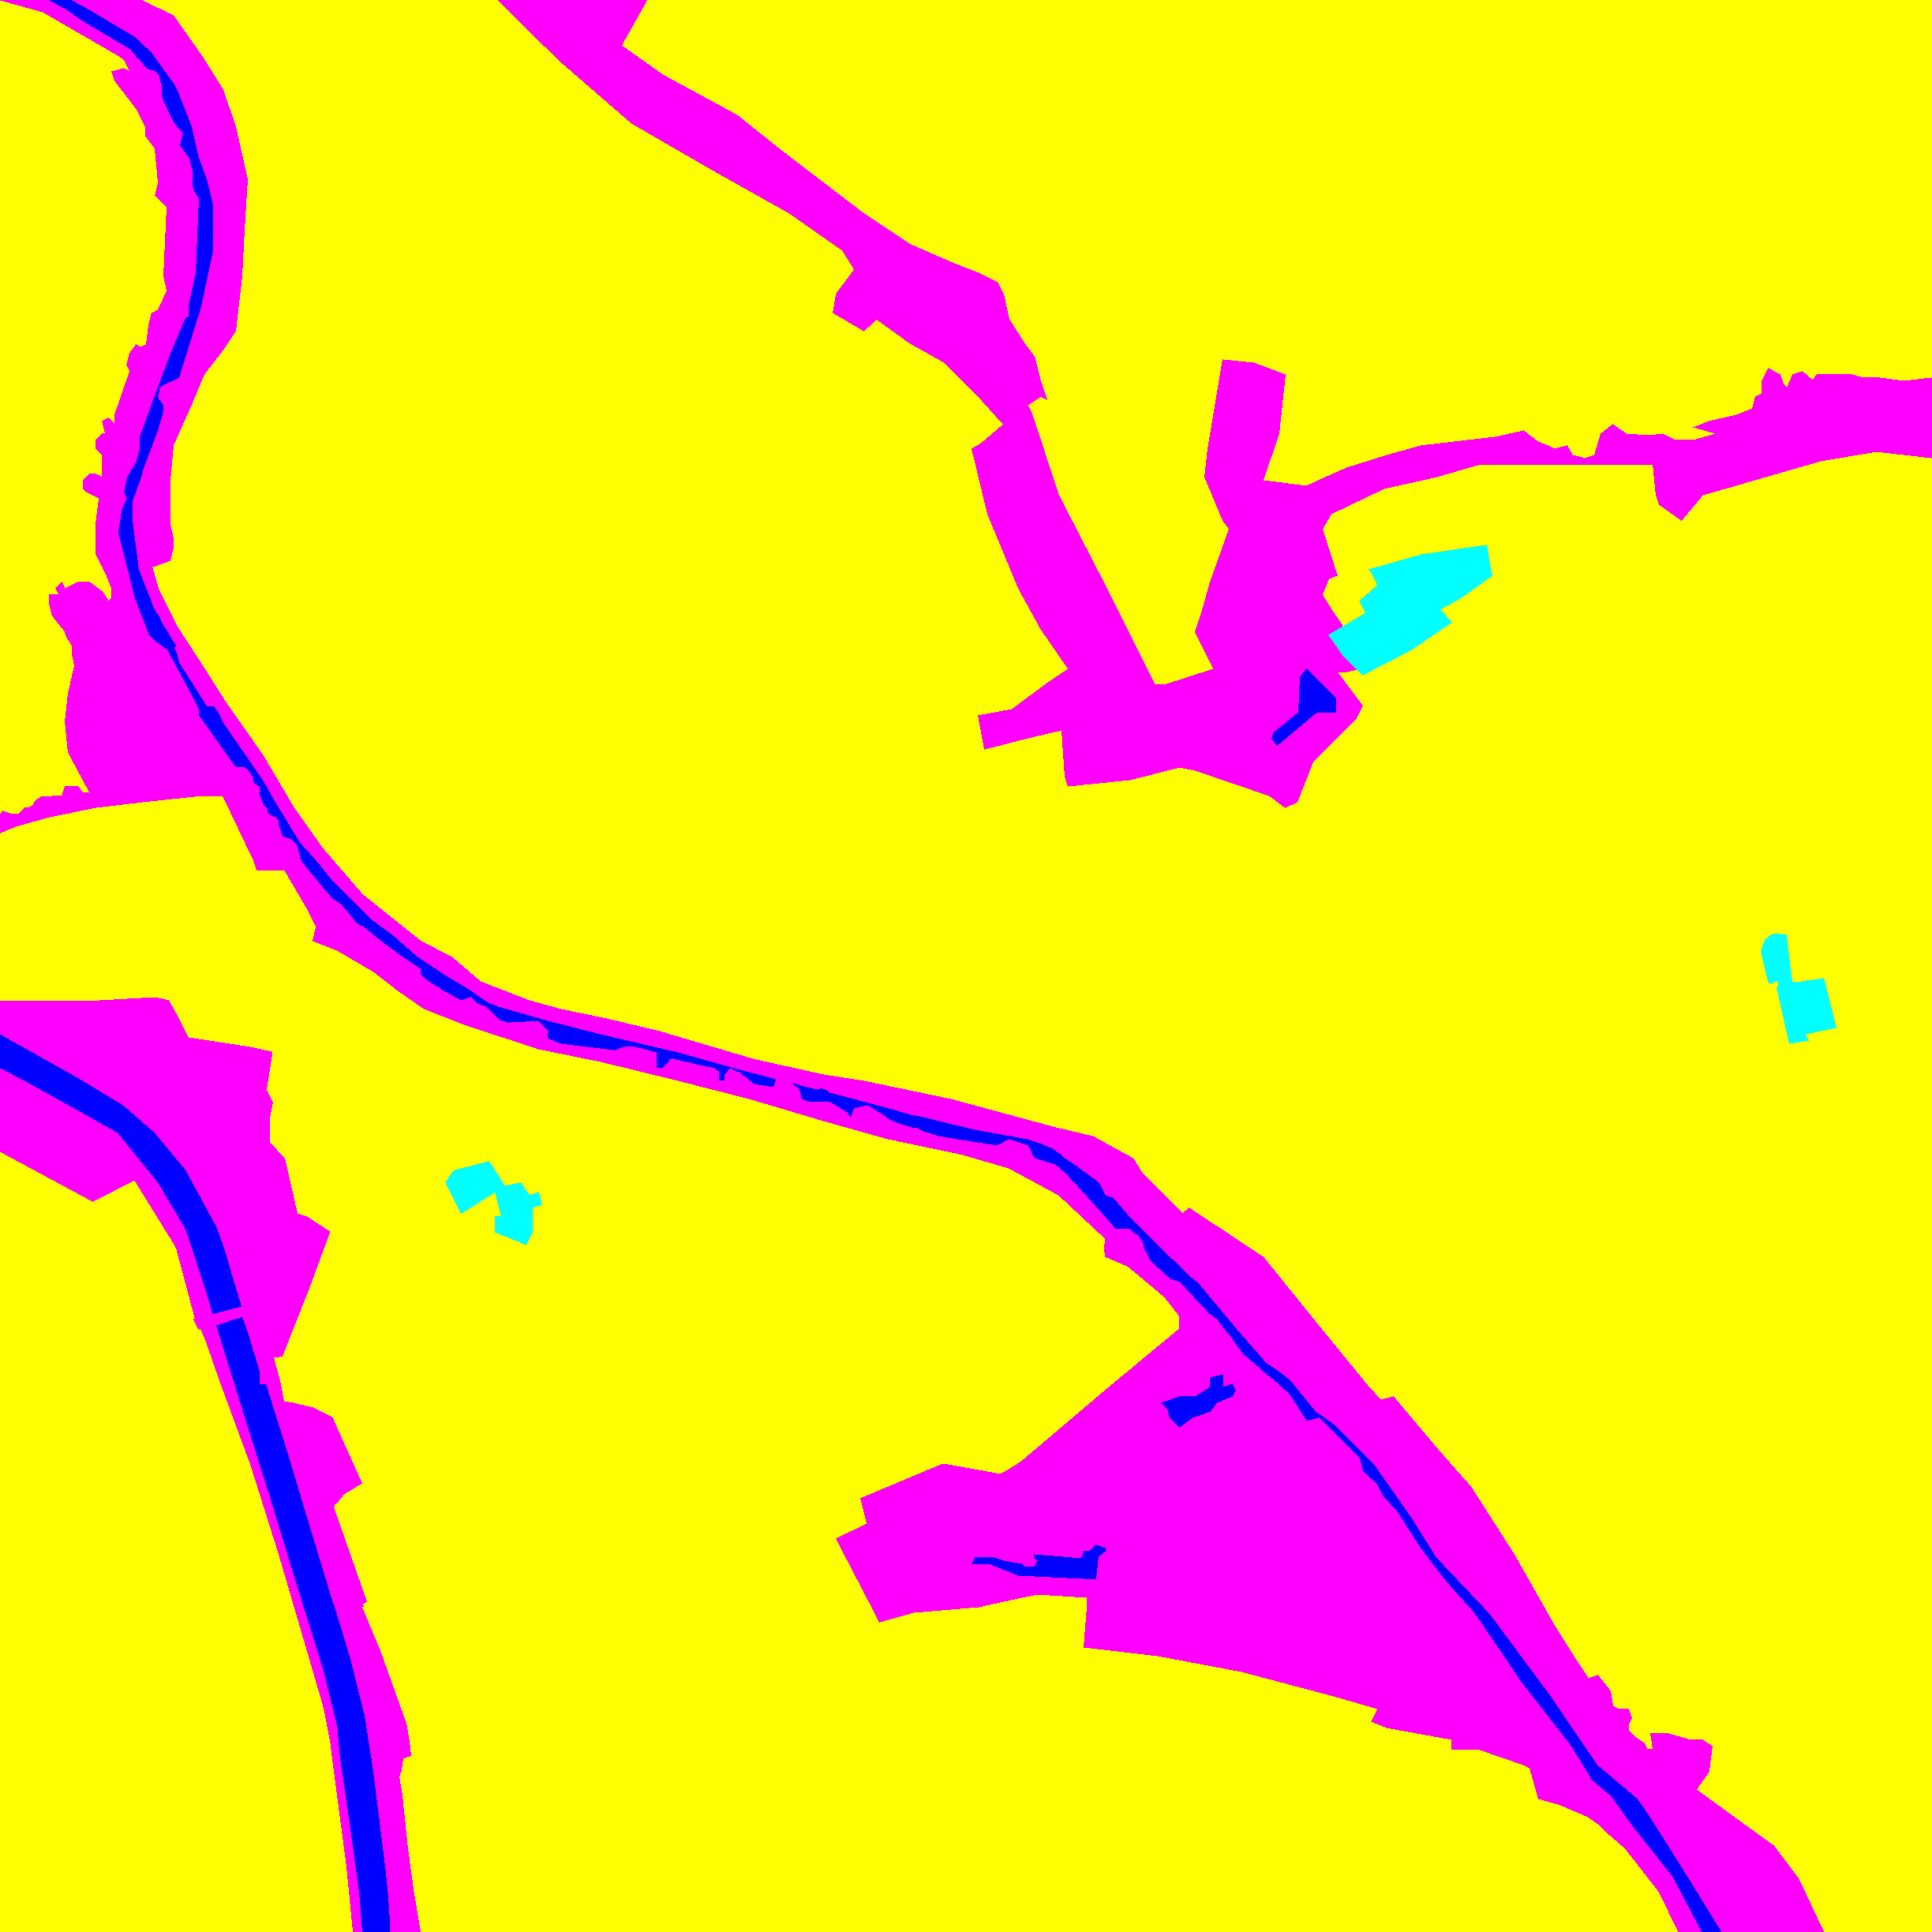

(2448, 2448, 3)
0 255
uint8


In [10]:
# DeepGlobe Mask
image_path = 'data/DeepGlobe/train/119_mask.png'
im = Image.open(image_path)
imarray = np.array(im)
display(im)
print(imarray.shape)
print(np.min(imarray), np.max(imarray))
print(imarray.dtype)

In [11]:
def normalize(array):
    return ((array - np.min(array)) / np.max(array))

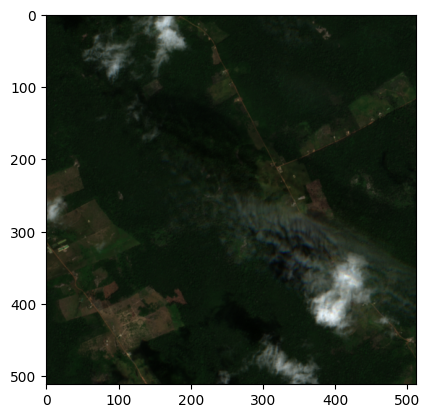

In [17]:
# AMAZON interpreted as RGB
image_path = 'data/AMAZON/Training/image/S2A_MSIL2A_20200111T142701_N0213_R053_T20NQG_20200111T164651_01_13.tif'
dataset = gdal.Open(image_path, gdal.GA_ReadOnly) 
# Note GetRasterBand() takes band no. starting from 1 not 0
dataset_array = dataset.ReadAsArray()
rgb_array = dataset_array[0:3].transpose((1,2,0))
rgb_array_normalized = normalize(rgb_array)

plt.imshow(rgb_array_normalized)

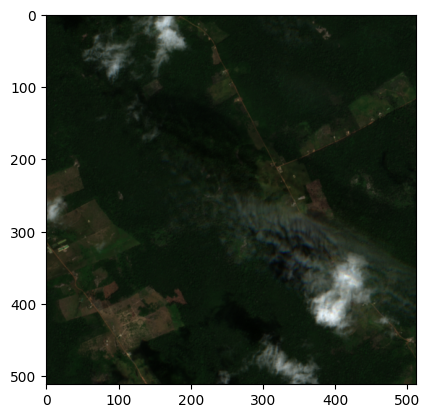

In [18]:
# AMAZON interpreted as RGB with rasterio
image_path = 'data/AMAZON/Training/image/S2A_MSIL2A_20200111T142701_N0213_R053_T20NQG_20200111T164651_01_13.tif'
with rasterio.open(image_path) as src:
    # Read the raster bands
    red_band = src.read(1)
    green_band = src.read(2)
    blue_band = src.read(3)
    # Combine the bands
    rgb_array = np.array([red_band, green_band, blue_band]).transpose(1, 2, 0)
    rgb_array_normalized = normalize(rgb_array)

plt.imshow(rgb_array_normalized)

In [13]:
from utils import get_file_paths

In [15]:
train_image_paths = get_file_paths('data/AMAZON/Training/image')
train_mask_paths = get_file_paths('data/AMAZON/Training/label')
val_image_paths = get_file_paths('data/AMAZON/Validation/images')
val_mask_paths = get_file_paths('data/AMAZON/Validation/masks')
test_image_paths = get_file_paths('data/AMAZON/Test/image')
test_mask_paths = get_file_paths('data/AMAZON/Test/mask')

In [19]:
# combine all the paths
all_image_paths = train_image_paths + val_image_paths + test_image_paths
all_mask_paths = train_mask_paths + val_mask_paths + test_mask_paths

# compute max and min values for each band
max_values = np.zeros(4)
min_values = np.zeros(4)
for image_path in all_image_paths:
    with rasterio.open(image_path) as src:
        for band_idx in range(1, 5):
            band = src.read(band_idx)
            max_values[band_idx - 1] = max(max_values[band_idx - 1], np.max(band))
            min_values[band_idx - 1] = min(min_values[band_idx - 1], np.min(band))

print(f"Max values: {max_values}")
print(f"Min values: {min_values}")


Max values: [16280. 15016. 27200. 15505.]
Min values: [0. 0. 0. 0.]
